In [34]:
import pandas as pd
studies_csv = pd.read_csv('../raw_data/master_list_6_jul_2020.csv', skiprows = 2)
studies_df = studies_csv.copy()

In [36]:
# check columns
studies_df.columns

Index(['Artist (last/only)\n(or other effect)', 'Artist (first)',
       'Style represented', 'Complete?', 'Tags \n(new, work-in-progress)',
       'Year of Death (N/A if living)', 'User', 'Style modifier (non-artist)',
       'sgl img folder', 'cards folder', 'batch #', 'Notes'],
      dtype='object')

In [37]:
# replace column names with easier things to type lol
studies_df.columns = ['l_name', 'f_name',
       'style_represented', 'complete', 'tags', 'yod', 'user', 'style_or_effect', 'sgl_img_folder',
       'cards_folder', 'batch_id', 'notes']

In [59]:
studies_df.head()

,l_name,f_name,style_represented,complete,tags,yod,user,style_or_effect,sgl_img_folder,cards_folder,batch_id,notes
0,Aalto,Alvar,Yes,x,"architecture, high contrast",1976,sureailabs,-,x,x,8.0,NaN
1,Aarons,Slim,Yes,x,"vibrant, photography, scene",2006,sureailabs,-,x,x,8.0,NaN
2,Abbey,Edwin Austin,Yes,x,"scene, realism",1911,EErratica,-,x,x,7.0,NaN
3,Abercrombie,Gertrude,Yes,x,"surrealism, dark,",1977,sureailabs,-,x,x,10.0,NaN
4,Abramović,Marina,Yes,x,"scene, photography",NaN,sureailabs,-,x,x,8.0,NaN


In [39]:
# keep only rows with tags in the tags column
tags_df = studies_df.dropna(subset = ['tags'])

In [40]:
# turn tags lists into a seperate column for each tag with 0, 1 presence indicator
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(binary = True)

# show the vectorizer your data
bow_vec.fit(tags_df['tags'])

In [43]:
# check number of unique tags
len(bow_vec.get_feature_names_out())

120

In [60]:
# actually transform data using the vectoriser, save it into a pandas dataframe
bow_rep = pd.DataFrame(columns = bow_vec.get_feature_names_out(), data = bow_vec.transform(tags_df['tags']).todense())
bow_rep.head()

,3d,abstract,angular,anime,architecture,art,babies,baroque,bauhaus,beatrix,...,surrrealism,symbolism,symbolist,textile,textured,ukiyo,vibrant,watercolor,whimsical,wildlife
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# create and fit a 2d PCA
from sklearn.decomposition import PCA

pca = PCA(2)

pca.fit(bow_rep)

pca.explained_variance_

In [47]:
# actually project only PC's
pcs = pca.transform(bow_rep)

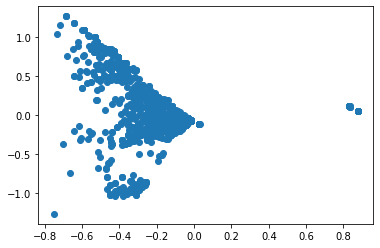

In [48]:
# plot
import matplotlib.pyplot as plt

plt.scatter(pcs[:, 0], pcs[:, 1])

In [52]:
# join bow representation
final_df = tags_df.join(bow_rep)

In [56]:
# join PCs representation
final_df = final_df.join(pd.DataFrame(pcs))

In [57]:
# save to csv
final_df.to_csv("../raw_data/master_list_6_jul_2020_w_bow_and_pcs.csv")